In [ ]:
import math                        
import numpy as np                  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib import lines
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Paramètres des plots

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# EXERCISE 1

**Analyse de la base de données “investment data”**

# QUESTION 1

Nous travaillons sur la base de données **Investment Data Set** qui peut être téléchargée depuis https://bitbucket.org/portierf/shared_files/downloads/invest.txt. Importer cette base de données et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [3]:
# Chargement des données dans un dataframe
filename = 'https://bitbucket.org/portierf/shared_files/downloads/invest'
df = pd.read_csv(filename + '.txt', sep=' ')

# Affichage des 5 premières lignes du dataframe construit
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# QUESTION 2

Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

Text(0.5, 1.0, 'Investment vs GNP')

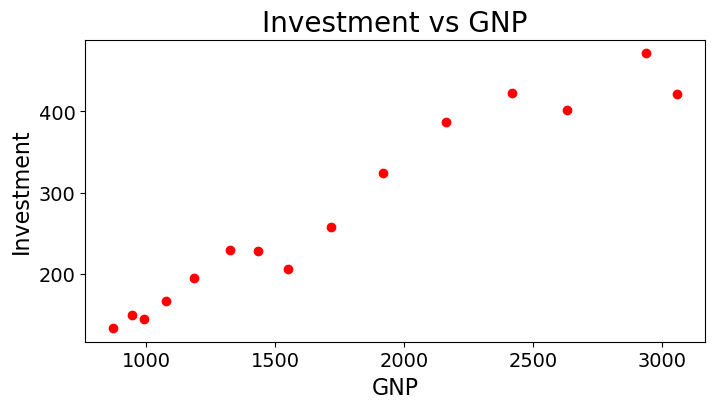

In [4]:
%matplotlib inline
# Graphe représentant l'évolution de 'investment' en fonction de 'GNP'
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(df['gnp'], df['invest'], 'ro')

plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title("Investment vs GNP")

In [5]:
# Ajout des 2 variables 'gnp' et 'invest' en échelle logarithmique dans le dataframe
df['gnpLog'] = np.log(df['gnp'])
df['investLog'] = np.log(df['invest'])

# Affichage des 5 premières lignes du dataframe
df.head()

,year,gnp,invest,cpi,interest,gnpLog,investLog
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


# QUESTION 3

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible.

## Intercept et pente
Pour le calcul de l'intercept $\hat\theta_0$ et la pente $\hat\theta_1$, on utilise les formules et les notations vues en cours (cas unidimensionnel):

$$
\hat\theta_0= \overline{y}_n -\hat{\theta}_1 \overline{x}_n,\qquad  \hat\theta_1=  \displaystyle\frac{ \sum_{i=1}^n (x_i-\overline{x}_n)(y_i -\overline{y}_n)}{\sum_{i=1}^n (x_i-\overline{x}_n)^2}
$$

In [6]:
# Définition des variables nécessaires pour appliquer les formules ci-dessus
x = df['gnpLog']
Y = df['investLog']
xm = x.mean()
Ym = Y.mean()

# Calculs de l'intercept (theta0_chap) et de la pente (theta1_chap)
theta1_chap = ((x - xm).T @ (Y - Ym)) / ((x - xm).T @ (x - xm))
theta0_chap = Ym - theta1_chap * xm

## Écarts types

Les écarts types de $\hat\theta_0$ et $\hat\theta_1$ sont respectivement définis par:
$$
\quad{\mathbb{V}\left[\hat\theta_0\right]}^{1/2} = \hat\sigma^2 \left(\frac{1}{n}+ \frac{\overline{x}_n^2}{\sum_{i=1}^n (x_i-\overline{x}_n)^2}\right ), 
\quad{\mathbb{V}\left[\hat\theta_1\right]}^{1/2} = \frac{\hat\sigma^2}{\sum_{i=1}^n (x_i-\overline{x}_n)^2}
$$
où $$\hat\sigma^2 = \frac{1}{n-2} \sum_{i=1}^n \left(y_i - (\hat\theta_0 + \hat\theta_1 x_i)\right)^2$$


In [7]:
# Définition des variables nécessaires pour appliquer les formules ci-dessus
n = len(x)
sigma2_chap = 1 / (n - 2) * (Y - (theta0_chap + theta1_chap * x)).T @ (Y - (theta0_chap + theta1_chap * x))

# Calculs des écarts types de theta0_chap et theta1_chap
sigma_theta0_chap = np.sqrt(sigma2_chap * (1 / n + xm**2 / ((x - xm).T @ (x - xm))))
sigma_theta1_chap = np.sqrt(sigma2_chap / ((x - xm).T @ (x-xm)))

## Coefficient de détermination

Le coefficient de détermination est défini par:
$$
R^2 = 1 - \sum_{i=1}^n \frac{(y_i - \hat y_i)^2}{(y_i - \overline{y}_n)^2}
$$

Celui-ci donne la proportion de variabilité de y qui est expliquée par le modèle. Plus il est proche de 1, meilleure est l’adéquation du modèle aux données.

In [8]:
# Définition de Y_chap nécessaire pour appliquer la formule ci-dessus
Y_chap = theta0_chap + theta1_chap * x

# Calcul du coefficient de determination
R2 =  1 - (Y - Y_chap).T @ (Y - Y_chap) / ((Y - Ym).T @ (Y - Ym))

## Affichage des résultats

In [9]:
# Stockage et affichage des résultats précédents dans un dataframe
df_reg = pd.DataFrame({'$\hat{\\theta}_0$': [theta0_chap],
                       '$\hat{\\theta}_1$' : [theta1_chap],
                       '$\mathbb{V} [\hat \\theta_0] ^{1 / 2}$': [sigma_theta0_chap],
                       '$\mathbb{V} [\hat \\theta_1] ^{1 / 2}$' : [sigma_theta1_chap],
                       '$R^{2}$': [R2]},
                        index=[''])
df_reg


,$\hat{\theta}_0$,$\hat{\theta}_1$,$\mathbb{V} [\hat \theta_0] ^{1 / 2}$,$\mathbb{V} [\hat \theta_1] ^{1 / 2}$,$R^{2}$
,-1.963591,1.015281,0.409547,0.055383,0.962757


# QUESTION 4

La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

## Test d'hypothèse

On cherche à savoir si la pente estimée est statistiquement significative (i.e. si elle est significativement différente de 0). Pour cela, on va considérer que:
- sous $H_0$ (hypothèse nulle): une droite horizontale et $\hat\theta_1$ n'ont pas de différence statisquement significative
- sous $H_1$ (hypothèse alternative): la pente $\hat\theta_1$ est différente d'une droite horizontale.

Ainsi, pour savoir si la pente est statisquement significative, on va chercher à rejeter $H_0$. Dans le cas d'une régression linéaire unidimensionnelle, on connaît la distribution de $\hat\theta_1$ sous $H_0$. C'est une loi de Student à $(n-2)$ degrés de liberté. On va donc pouvoir réaliser un test de student et calculer la statisque de test ainsi que sa p-valeur. Si cette dernière est suffisamment petite, on pourra rejeter $H_0$.

## Statistique de test et p-valeur

Sous $H_0$, la statique de test $t$ et sa p-valeur $p$ valent respectivement:
$$
t = \frac{\hat\theta_1}{{\mathbb{V}\left[\hat\theta_1\right]}^{1/2}},\ \
p = (1-F(\left|t\right|))*2
$$
où $F$ est la fonction de répartition de la loi de Student.


In [10]:
# Calcul de la statistique de test
t_statistique = theta1_chap / sigma_theta1_chap

# Calcul de la p-valeur
dl = n - 2 # degrés de liberté
p_valeur = (1 - stats.t.cdf(abs(t_statistique), dl)) * 2

print('La statisque de test vaut %0.5f' %(t_statistique))
print('La p-valeur vaut %0.15f' %(p_valeur))

La statisque de test vaut 18.33198
La p-valeur vaut 0.000000000113637


## Conclusion

Étant donné la faible p-valeur, il est légitime de rejeter $H_0$. La pente est donc statisquement significative.

# QUESTION 5

Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%.

## Valeur prédite et intervalle de confiance

Soit $\hat y_0$ la valeur prédite par notre modèle pour une nouvelle valeur non observée $x_0$ de $x$.  
L'intervalle de confiance pour $\hat y_0$ (i.e. $\hat\theta_0 + \hat\theta_1 x_0$) est:
$$
\left [ \hat y_0 \pm t_{n-2,1-\alpha/2}\ \hat\sigma \sqrt{\frac{1}{n}+ \frac{(x_0 -\overline{x}_n)^2}{\sum_{i=1}^n (x_i-\overline{x}_n)^2}} \right ] \\
$$
où
$t_{n-2,1-\alpha/2}$ est le quantile de la loi de student à $(n-2)$ degrés de liberté au niveau de confiance $1 − \alpha$.

In [11]:
# Définition des variables nécessaires pour appliquer les formules ci-dessus
x_0 = np.log(1000)
prediction_0 = theta0_chap + theta1_chap * x_0
sigma_prediction_0 = np.sqrt(sigma2_chap * (1 / n + (x_0 - xm)**2 / ((x - xm).T @ (x - xm))))

# Calcul de l'intervalle de confiance 
alpha = (100 - 90) * 0.01
niveau = 1 - alpha/2
quantile = stats.t.ppf(niveau, n - 2)

IC_inf = prediction_0 - quantile * sigma_prediction_0
IC_sup = prediction_0 + quantile * sigma_prediction_0

print("Investissement prédit pour GNP = 1000 (échelle logarithmique): %0.5f" %(prediction_0))
print("Investissement prédit pour GNP = 1000 (base 10): %0.5f" %(np.exp(prediction_0)))
print("Intervalle de confiance IC (échelle logarithmique) = [%0.5f %0.5f]" %(IC_inf, IC_sup))
print("Intervalle de confiance IC (base 10) = [%0.5f %0.5f]" %(np.exp(IC_inf), np.exp(IC_sup)))

Investissement prédit pour GNP = 1000 (échelle logarithmique): 5.04972
Investissement prédit pour GNP = 1000 (base 10): 155.97943
Intervalle de confiance IC (échelle logarithmique) = [4.98822 5.11123]
Intervalle de confiance IC (base 10) = [146.67553 165.87349]


## Intervalle de prédiction

On désire maintenant expliquer à l’aide du modèle construit la valeur $y_0$ de la variable $y$ étant donné $x_0$.
L'intervalle de prédiction pour $y_0$ est:
$$
\left [ y_0 \pm t_{n-2,1-\alpha/2}\ \hat\sigma \sqrt{1 + \frac{1}{n}+ \frac{(x_0 -\overline{x}_n)^2}{\sum_{i=1}^n (x_i-\overline{x}_n)^2}} \right ] \\
$$
où de nouveau
$t_{n-2,1-\alpha/2}$ est le quantile de la loi de student à $(n-2)$ degrés de liberté au niveau de confiance $1 − \alpha$.


In [12]:
sigma_explication_0 = np.sqrt(sigma2_chap * (1 + 1 / n + (x_0 - xm)**2 / ((x - xm).T @ (x - xm))))

IP_inf = prediction_0 - quantile * sigma_explication_0
IP_sup = prediction_0 + quantile * sigma_explication_0

print("Intervalle de prédiction IP (échelle logarithmique) = [%0.5f %0.5f]" %(IP_inf, IP_sup))
print("Intervalle de prédiction IP (base 10) = [%0.5f %0.5f]" %(np.exp(IP_inf), np.exp(IP_sup)))

Intervalle de prédiction IP (échelle logarithmique) = [4.88282 5.21663]
Intervalle de prédiction IP (base 10) = [132.00239 184.31168]


# QUESTION 6

Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

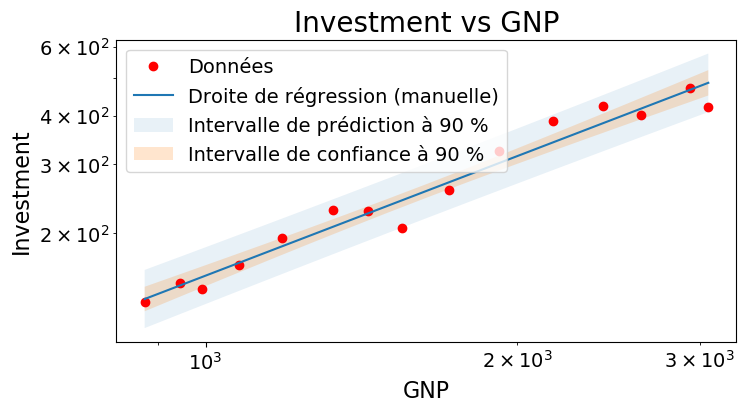

In [13]:
%matplotlib inline

# Définition des variables nécessaires pour calculer les intervalles CI et PI pour toutes les valeurs de log(GNP)
x_nonObs = np.linspace(df['gnpLog'].min(), df['gnpLog'].max(), num = n)
prediction_nonObs = theta0_chap + theta1_chap * x_nonObs
sigma_prediction_nonObs = np.sqrt(sigma2_chap * (1 / n + (x_nonObs - xm)**2 / ((x - xm).T @ (x - xm))))
sigma_explication_nonObs = np.sqrt(sigma2_chap * (1 + 1 / n + (x_nonObs - xm)**2 / ((x - xm).T @ (x - xm))))
sigma_prediction_nonObs = np.sqrt(sigma2_chap * (1 / n + (x_nonObs - xm)**2 / ((x - xm).T @ (x - xm))))
sigma_explication_nonObs = np.sqrt(sigma2_chap * (1 + 1 / n + (x_nonObs - xm)**2 / ((x - xm).T @ (x - xm))))

# Construction du graphe représentant l'évolution de 'investment' en fonction de 'GNP' 
# avec sa droite de régression et les intervalles de confiance 
# et prédiction définis précédemment

plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(df['gnp'], df['invest'], 'ro', label='Données')
plt.plot(df['gnp'], np.exp(theta1_chap * df['gnpLog'] + (theta0_chap)), label='Droite de régression (manuelle)')
plt.fill_between(np.exp(x_nonObs),
                 np.exp(prediction_nonObs - quantile * sigma_explication_nonObs),
                 np.exp(prediction_nonObs + quantile * sigma_explication_nonObs),
                 alpha=0.1, label='Intervalle de prédiction à 90 %')
plt.fill_between(np.exp(x_nonObs),
                 np.exp(prediction_nonObs - quantile * sigma_prediction_nonObs),
                 np.exp(prediction_nonObs + quantile * sigma_prediction_nonObs),
                 alpha=0.2, label='Intervalle de confiance à 90 %')

plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title("Investment vs GNP")
plt.yscale('log')
plt.xscale('log')
plt.legend()


# QUESTION 7

En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [14]:
# Régression linéaire avec scikit-learn
reg = linear_model.LinearRegression()
reg.fit(np.array([x]).T, Y)
theta0_chap_skl = reg.intercept_
theta1_chap_skl = reg.coef_[0]
Y_chap_skl = theta0_chap_skl + theta1_chap_skl * x

# Coefficient de détermination
R2_skl = r2_score(Y, Y_chap_skl) 

# Investissement prédit par le modèle de scikit-learn pour GNP=1000
prediction_0_skl = theta0_chap_skl + theta1_chap_skl * x_0

# Stockage et affichage des résultats précédents dans un dataframe
df_skl = pd.DataFrame({'$\hat{\\theta}_0^{skl}$': [theta0_chap_skl],
                       '$\hat{\\theta}_1^{skl}$' : [theta1_chap_skl],                       
                       '$R^{2 skl}$': [R2_skl],
                       '$\hat y_{0} (log)$' : [prediction_0_skl],  
                       '$\hat y_{0} (base 10)$' : [np.exp(prediction_0_skl)]},
                        index=[''])
    
df_skl

,$\hat{\theta}_0^{skl}$,$\hat{\theta}_1^{skl}$,$R^{2 skl}$,$\hat y_{0} (log)$,$\hat y_{0} (base 10)$
,-1.963591,1.015281,0.962757,5.049724,155.979428


In [15]:

# Vérification que les valeurs obtenues manuellement et avec scikit-learn sont les mêmes
if np.isclose(theta0_chap, theta0_chap_skl) == True:
    print('Les 2 calculs de l\'intercept aboutissent au même résultat')   
else:    
    print('Les 2 calculs de l\'intercept ne donnent pas le même résultat')
    
if np.isclose(theta1_chap, theta1_chap_skl) == True:
    print('Les 2 calculs de la pente aboutissent au même résultat')   
else:    
    print('Les 2 calculs de la pente ne donnent pas le même résultat')
    
if np.isclose(R2, R2_skl) == True:
    print('Les 2 calculs du coefficient de détermination aboutissent au même résultat')   
else:    
    print('Les 2 calculs du coefficient de détermination ne donnent pas le même résultat')
    
if np.isclose(prediction_0, prediction_0_skl) == True:
    print('Les 2 calculs de l\'investissement pour GNP=1000 aboutissent au même résultat')   
else:    
    print('Les 2 calculs de l\'investissemnt pour GNP=1000 ne donnent pas même résultat')  

Les 2 calculs de l'intercept aboutissent au même résultat
Les 2 calculs de la pente aboutissent au même résultat
Les 2 calculs du coefficient de détermination aboutissent au même résultat
Les 2 calculs de l'investissement pour GNP=1000 aboutissent au même résultat


# QUESTION 8
  
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

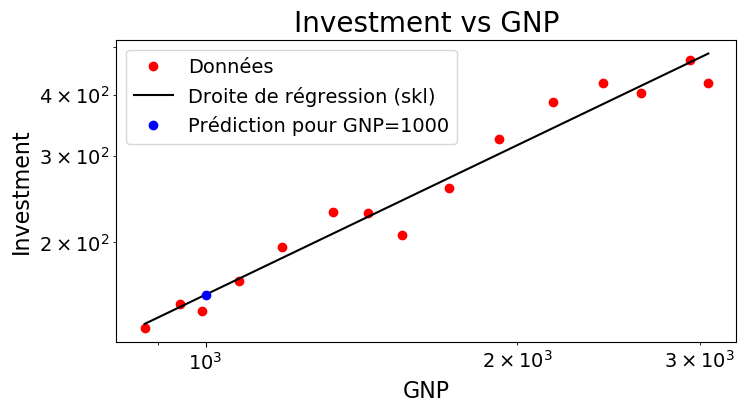

In [16]:
%matplotlib inline
# Graphe représentant l'évolution de 'investment' en fonction de 'GNP' 
# avec sa droite de régression (dérivée de scikit-learn) et le point 
# d'investissemnt prédit pour GNP=1000

plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(df['gnp'], df['invest'], 'ro', label='Données')
plt.plot(df['gnp'], np.exp(theta1_chap_skl * df['gnpLog'] + (theta0_chap_skl)),'k',label='Droite de régression (skl)')
plt.plot(np.exp(np.array([x_0])), np.exp(np.array([prediction_0_skl])), 'bo', label='Prédiction pour GNP=1000')

plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title("Investment vs GNP")
plt.yscale('log')
plt.xscale('log')
plt.legend()

# NOTE 
On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

# QUESTION 9
Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de rang plein ?

## Matrice de Gram
La matrice de Gram $\hat G$ est définie par:
$\hat G = X^T X$ 

In [17]:
# Matrice de Gram
X = np.concatenate((np.ones(shape = (n, 1)),
               np.array([np.log(df['gnp'])]).T,
               np.array([df['interest']]).T),
               axis=1)

gram = X.T @ X
print('La matrice de Gram est la suivante:')
print(gram)
print()

# Rang de la matrice de Gram
rank_gram = np.linalg.matrix_rank(gram)

# Si la matrice de Gram est de rang plein, son rang est égal à son nombre de colonnes
if np.isclose(rank_gram, gram.shape[1]) == True:
    print('La matrice de Gram est de rang plein')   
else:    
    print('La matrice de Gram n\'est pas de rang plein')

La matrice de Gram est la suivante:
[[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]

La matrice de Gram est de rang plein


# QUESTION 10

Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.

## Estimation des coefficients
Les coefficients de $\hat\theta$ $\in$ $R^{\ p+1}$ sont données par:
$$
\hat\theta = (X^TX)^{-1}y
$$
où $X$ $\in$ $R^{\ n \times (p+1)}$  et $y$ $\in$ $R^{\ n}$ 


In [18]:
Y = np.array([Y]).T
gram_inv = np.linalg.inv(gram)

theta_chap = gram_inv @ X.T @ Y
theta0_chap = theta_chap[0]
theta1_chap = theta_chap[1]
theta2_chap = theta_chap[2]

## Estimation des écarts types

Pour $i=1,2,..,(p+1)$, les écart type de $\hat\theta$ sont définis par:
$$
\quad{\mathbb{V}\left[\hat\theta_i\right]}^{1/2} = \hat\sigma \sqrt{ e_i^T(X^T X)^{-1}e_i}
$$
où $$\hat\sigma^2 = \frac{1}{n-3} \sum_{i=1}^n \left(y_i - \hat y_i \right)^2$$

In [19]:
p = gram.shape[1] - 1 

# Définition de Y_chap nécessaire pour appliquer la formule ci-dessus
Y_chap = X @ theta_chap

sigma2_chap = 1 / (n - p - 1) * (Y - Y_chap).T @ (Y - Y_chap) 
sigma_theta_chap = np.sqrt(sigma2_chap * np.diag(gram_inv))

## Coefficient de détermination

Le coefficient de détermination est défini par:
$$
R^2 = 1 - \sum_{i=1}^n \frac{(y_i - \hat y_i)^2}{(y_i - \overline{y}_n)^2}
$$

Celui-ci donne la proportion de variabilité de y qui est expliquée par le modèle. Plus il est proche de 1, meilleure est l’adéquation du modèle aux données.

In [20]:
# Calcul du coefficient de determination
R2 =  1 - (Y - Y_chap).T @ (Y - Y_chap) / ((Y - Ym).T @ (Y - Ym))

## Affichage des résultats

In [21]:
# Stockage et affichage des résultats précédents dans un dataframe
df_reg = pd.DataFrame({'$\hat{\\theta}_0$': theta0_chap[0],
                       '$\hat{\\theta}_1$' : theta1_chap[0],                       
                       '$\hat{\\theta}_2$' : theta2_chap[0],
                       '$\mathbb{V} [\hat \\theta_0] ^{1 / 2}$': sigma_theta_chap[0][0],
                       '$\mathbb{V} [\hat \\theta_1] ^{1 / 2}$': sigma_theta_chap[0][1],
                       '$\mathbb{V} [\hat \\theta_2] ^{1 / 2}$': sigma_theta_chap[0][2],
                       '$R^{2}$': R2[0]},
                        index=[''])
df_reg


,$\hat{\theta}_0$,$\hat{\theta}_1$,$\hat{\theta}_2$,$\mathbb{V} [\hat \theta_0] ^{1 / 2}$,$\mathbb{V} [\hat \theta_1] ^{1 / 2}$,$\mathbb{V} [\hat \theta_2] ^{1 / 2}$,$R^{2}$
,-2.180455,1.051243,-0.006529,0.662399,0.102061,0.015344,0.963311


## Signification de l'intercept $(\theta_0)$

On cherche à savoir si l'intercept est significativement différent de 0. 
Pour cela, on procède comme pour la question 4, et on réalise un test de Student de significativité en considérant que $H_0$ est l'hypothèse pour laquelle l'intercept vaut 0.

Sous $H_0$, la statique de test $t$ et sa p-valeur $p$ valent respectivement:
$$
t = \frac{\hat\theta_0}{{\mathbb{V}\left[\hat\theta_0\right]}^{1/2}},\ \
p = (1-F(\left|t\right|))*2
$$
où $F$ est la fonction de répartition de la loi de Student.

In [22]:
# Calcul de la statistique de test
t_statistique = theta0_chap[0] / sigma_theta_chap[0][0]

# Calcul de la p-valeur
dl = n - p - 1 # degrés de liberté
p_valeur = (1 - stats.t.cdf(abs(t_statistique), dl)) * 2

print('La statisque de test vaut %0.5f' %(t_statistique))
print('La p-valeur vaut %0.15f' %(p_valeur))

La statisque de test vaut -3.29175
La p-valeur vaut 0.006438367050963


## Signification de $\theta_1$

On cherche à savoir si $\theta_1$ est significativement différent de 0. 
De nouveau, on réalise un test de Student de significativité en considérant que $H_0$ est l'hypothèse pour laquelle $\theta_1$ vaut 0.

Sous $H_0$, la statique de test $t$ et sa p-valeur $p$ valent respectivement:
$$
t = \frac{\hat\theta_1}{{\mathbb{V}\left[\hat\theta_1\right]}^{1/2}},\ \
p = (1-F(\left|t\right|))*2
$$
où $F$ est la fonction de répartition de la loi de Student.

In [23]:
# Calcul de la statistique de test
t_statistique = theta1_chap[0] / sigma_theta_chap[0][1]

# Calcul de la p-valeur
dl = n - p -1 # degrés de liberté
p_valeur = (1 - stats.t.cdf(abs(t_statistique), dl)) * 2

print('La statisque de test vaut %0.5f' %(t_statistique))
print('La p-valeur vaut %0.15f' %(p_valeur))

La statisque de test vaut 10.30010
La p-valeur vaut 0.000000259951685


## Signification de $\theta_2$

On cherche à savoir si $\theta_2$ est significativement différent de 0. 
De nouveau, on réalise un test de Student de significativité en considérant que $H_0$ est l'hypothèse pour laquelle $\theta_2$ vaut 0.

Sous $H_0$, la statique de test $t$ et sa p-valeur $p$ valent respectivement:
$$
t = \frac{\hat\theta_2}{{\mathbb{V}\left[\hat\theta_2\right]}^{1/2}},\ \
p = (1-F(\left|t\right|))*2
$$
où $F$ est la fonction de répartition de la loi de Student.

In [24]:
# Calcul de la statistique de test
t_statistique = theta2_chap[0] / sigma_theta_chap[0][2]

# Calcul de la p-valeur
dl = n - p - 1 # degrés de liberté
p_valeur = (1 - stats.t.cdf(abs(t_statistique), dl)) * 2

print('La statisque de test vaut %0.5f' %(t_statistique))
print('La p-valeur vaut %0.15f' %(p_valeur))

La statisque de test vaut -0.42549
La p-valeur vaut 0.678007141884057


## Conclusion

D'après les p-valeurs obtenues avec les tests de Student de significativité, seuls les paramètres $\theta_0$ et $\theta_1$ sont significatifs.

# QUESTION 11
Pour les valeurs de GNP 1000 et interest 10, i.e., $x = (1, 1000, 10) ^T$, prédire log(investment) et donner les intervalles de confiance CI$(x)$ et PI$(x)$ au niveau 99.9%.

## Intervalle de confiance

Soit $\hat y_0$ la valeur prédite par notre modèle pour une nouvelle valeur non observée $x_0$ de $x$.  
L'intervalle de confiance pour $\hat y_0$ est:
$$
\left [ \hat y_0 \pm t_{n-p-1,1-\alpha/2}\ \hat\sigma \sqrt{x_0^T(X^TX)^{-1}x_0} \right ] \\
$$
où
$t_{n-2,1-\alpha/2}$ est le quantile de la loi de student à $(n-p-1)$ degrés de liberté au niveau de confiance $1 − \alpha$.

In [25]:
# Définition des variables nécessaires pour appliquer les formules ci-dessus
x_0 = np.array([1, np.log(1000), 10])
prediction_0 = np.asscalar(x_0 @ theta_chap)
sigma_prediction_0 = np.asscalar(np.sqrt(sigma2_chap * (x_0.T @ gram_inv @ x_0)))

# Calcul de l'intervalle de confiance
alpha = (100 - 99.9) * 0.01
niveau = 1 - alpha / 2
quantile = stats.t.ppf(niveau, n - p -1)

IC_inf = prediction_0 - quantile * sigma_prediction_0
IC_sup = prediction_0 + quantile * sigma_prediction_0

print("Investissement prédit pour GNP = 1000 et interest=10 (échelle logarithmique): %0.5f" %(prediction_0))
print("Investissement prédit pour GNP = 1000 et interest=10 (base 10): %0.5f" %(np.exp(prediction_0)))
print("Intervalle de confiance IC (échelle logarithmique) = [%0.5f, %0.5f]" %(IC_inf, IC_sup))
print("Intervalle de confiance IC (base 10) = [%0.5f, %0.5f]" %(np.exp(IC_inf), np.exp(IC_sup)))

Investissement prédit pour GNP = 1000 et interest=10 (échelle logarithmique): 5.01598
Investissement prédit pour GNP = 1000 et interest=10 (base 10): 150.80441
Intervalle de confiance IC (échelle logarithmique) = [4.64018, 5.39178]
Intervalle de confiance IC (base 10) = [103.56341, 219.59467]


## Intervalle de prédiction

On désire maintenant expliquer à l’aide du modèle construit la valeur $y_0$ de la variable $y$ étant donné $x_0$.
L'intervalle de prédiction pour $y_0$ est:
$$
\left [ y_0 \pm t_{n-p-1,1-\alpha/2}\ \hat\sigma \sqrt{1 + x_0^T(X^TX)^{-1}x_0} \right ] \\
$$
où de nouveau
$t_{n-2,1-\alpha/2}$ est le quantile de la loi de student à $(n-p-1)$ degrés de liberté au niveau de confiance $1 − \alpha$.

In [26]:
sigma_explication_0 = np.asscalar(np.sqrt(sigma2_chap * (1 + x_0.T @ gram_inv @ x_0)))

IP_inf = prediction_0 - quantile * sigma_explication_0
IP_sup = prediction_0 + quantile * sigma_explication_0

print("Intervalle de prédiction IP (échelle logarithmique) = [%0.5f, %0.5f]" %(IP_inf, IP_sup))
print("Intervalle de prédiction IP (base 10) = [%0.5f, %0.5f]" %(np.exp(IP_inf), np.exp(IP_sup)))

Intervalle de prédiction IP (échelle logarithmique) = [4.47380, 5.55816]
Intervalle de prédiction IP (base 10) = [87.68960, 259.34627]


# QUESTION 12
Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

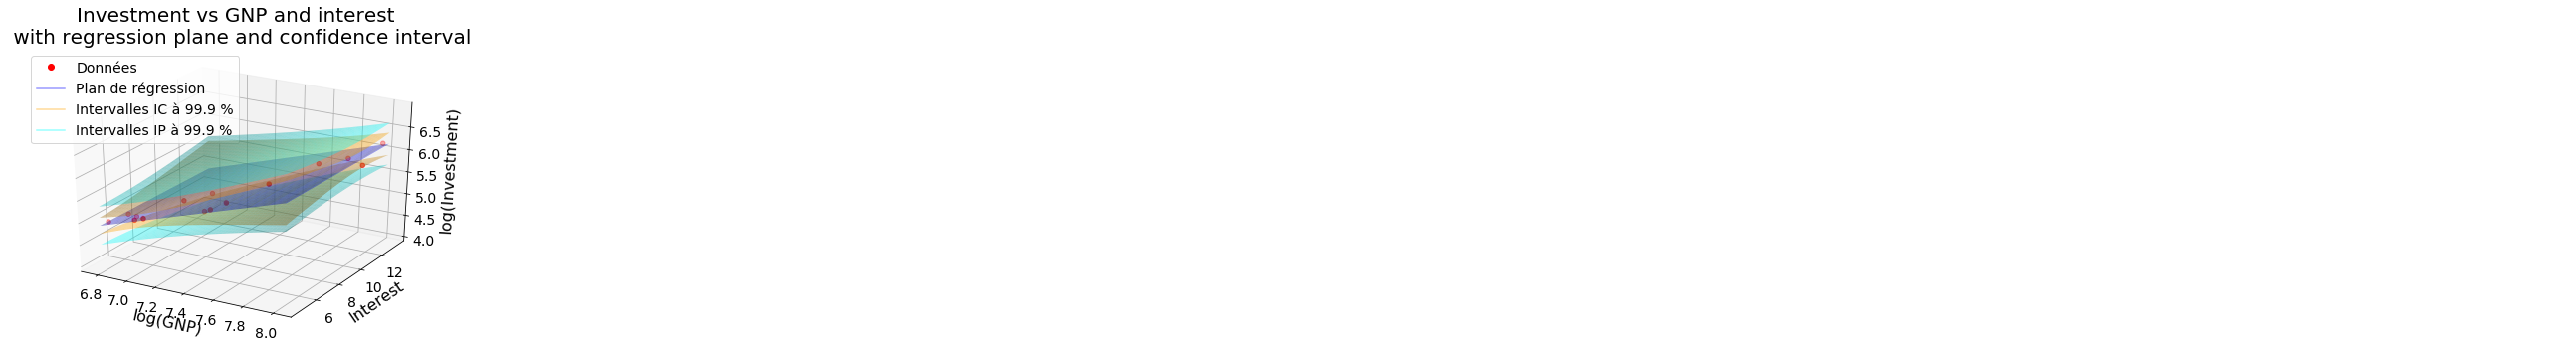

In [27]:
%matplotlib qt

# Définition des variables nécessaires pour calculer les plans
xp   = np.linspace(df['gnpLog'].min(), df['gnpLog'].max(), 100)
yp   = np.linspace(df['interest'].min(), df['interest'].max(), 100)
Xp,Yp = np.meshgrid(xp,yp)

x_nonObs = np.column_stack((np.ones(Xp.ravel().shape), Xp.ravel(), Yp.ravel()))
prediction_nonObs = x_nonObs @ theta_chap
sigma_prediction_nonObs = np.sqrt(sigma2_chap * np.diag((x_nonObs @ gram_inv @ x_nonObs.T)))
sigma_explication_nonObs = np.sqrt(sigma2_chap * (1 + np.diag((x_nonObs @ gram_inv @ x_nonObs.T))))
IC_inf_nonObs = (prediction_nonObs.T - quantile * sigma_prediction_nonObs).T
IC_sup_nonObs = (prediction_nonObs.T + quantile * sigma_prediction_nonObs).T
IP_inf_nonObs = (prediction_nonObs.T - quantile * sigma_explication_nonObs).T
IP_sup_nonObs = (prediction_nonObs.T + quantile * sigma_explication_nonObs).T

# # Graphe représentant l'évolution de 'investment' en fonction de 'log(GNP)'' et 'Interest' 
# avec les plans de régression et les surfaces correspondant aux intervalles de confiance
fig = plt.figure()
ax  = Axes3D(fig)
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)')
ax.set_title("Investment vs GNP and interest \n with regression plane and confidence interval\n")

ax.plot_surface(Xp, Yp, prediction_nonObs.reshape(Xp.shape), color='blue', alpha=0.4)
ax.plot_surface(Xp, Yp, IC_inf_nonObs.reshape(Xp.shape), color='orange', alpha=0.4)
ax.plot_surface(Xp, Yp, IC_sup_nonObs.reshape(Xp.shape), color='orange', alpha=0.4)
ax.plot_surface(Xp, Yp, IP_inf_nonObs.reshape(Xp.shape), color='cyan', alpha=0.4)
ax.plot_surface(Xp, Yp, IP_sup_nonObs.reshape(Xp.shape), color='cyan', alpha=0.4)
ax.scatter(X.T[:][1], X.T[:][2], Y, c = 'r', marker = 'o')

scatter1_proxy = plt.Line2D([10],[0], linestyle="none", c='red', marker = 'o')
scatter2_proxy = plt.Line2D([10],[0], linestyle="-", c='blue', alpha=0.4)
scatter3_proxy = plt.Line2D([10],[0], linestyle="-", c='orange', alpha=0.4)
scatter4_proxy = plt.Line2D([10],[0], linestyle="-", c='cyan', alpha=0.4)
ax.legend([scatter1_proxy, scatter2_proxy, scatter3_proxy, scatter4_proxy], 
          ['Données', 'Plan de régression', 'Intervalles IC à 99.9 %', 'Intervalles IP à 99.9 %'], numpoints = 1)

plt.show()

# QUESTION 13
En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [28]:
# Régression linéaire avec scikit-learn
reg = linear_model.LinearRegression()
reg.fit(X, Y)
theta0_chap_skl = reg.intercept_
theta1_chap_skl = reg.coef_[0][1]
theta2_chap_skl = reg.coef_[0][2]
theta_chap_skl = np.concatenate((reg.intercept_, reg.coef_[0][1:]), axis = 0)

Y_chap_skl = X @ theta_chap_skl

# Coefficient de détermination
R2_skl = r2_score(Y, Y_chap_skl) 

# Investissement prédit par le modèle de scikit-learn pour GNP=1000
prediction_0_skl = np.asscalar(x_0 @ theta_chap_skl)

# Stockage et affichage des résultats précédents dans un dataframe
df_skl = pd.DataFrame({'$\hat{\\theta}_0^{skl}$': [theta0_chap_skl][0],
                       '$\hat{\\theta}_1^{skl}$' : [theta1_chap_skl],                       
                       '$\hat{\\theta}_2^{skl}$' : [theta2_chap_skl],
                       '$R^{2 skl}$': [R2_skl],
                       '$\hat y_{0} (log)$' : [prediction_0_skl],  
                       '$\hat y_{0} (base 10)$' : [np.exp(prediction_0_skl)]},
                        index=[''])
    
df_skl
 
   

,$\hat{\theta}_0^{skl}$,$\hat{\theta}_1^{skl}$,$\hat{\theta}_2^{skl}$,$R^{2 skl}$,$\hat y_{0} (log)$,$\hat y_{0} (base 10)$
,-2.180455,1.051243,-0.006529,0.963311,5.015984,150.804415


In [29]:
# Vérification que les valeurs obtenues manuellement et avec scikit-learn sont les mêmes
if np.isclose(theta0_chap, theta0_chap_skl) == True:
    print('Les 2 calculs du premier coefficient aboutissent au même résultat')   
else:    
    print('Les 2 calculs du premier coefficient ne donnent pas le même résultat')
    
if np.isclose(theta1_chap, theta1_chap_skl) == True:
    print('Les 2 calculs du deuxième coefficient aboutissent au même résultat')   
else:    
    print('Les 2 calculs du deuxième coefficient ne donnent pas le même résultat')
    
if np.isclose(theta1_chap, theta1_chap_skl) == True:
    print('Les 2 calculs du troisième coefficient aboutissent au même résultat')   
else:    
    print('Les 2 calculs du troisième coefficient ne donnent pas le même résultat')    
    
if np.isclose(R2, R2_skl) == True:
    print('Les 2 calculs du coefficient de détermination aboutissent au même résultat')   
else:    
    print('Les 2 calculs du coefficient de détermination ne donnent pas le même résultat')
    
if np.isclose(prediction_0, prediction_0_skl) == True:
    print('Les 2 calculs de l\'investissement pour GNP=1000 et interest=10 aboutissent au même résultat')   
else:    
    print('Les 2 calculs de l\'investissemnt pour GNP=1000 et interest=10 ne donnent pas même résultat')  

Les 2 calculs du premier coefficient aboutissent au même résultat
Les 2 calculs du deuxième coefficient aboutissent au même résultat
Les 2 calculs du troisième coefficient aboutissent au même résultat
Les 2 calculs du coefficient de détermination aboutissent au même résultat
Les 2 calculs de l'investissement pour GNP=1000 et interest=10 aboutissent au même résultat
